In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [2]:
df =  pd.read_csv('diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

<Axes: xlabel='Diabetes', ylabel='count'>

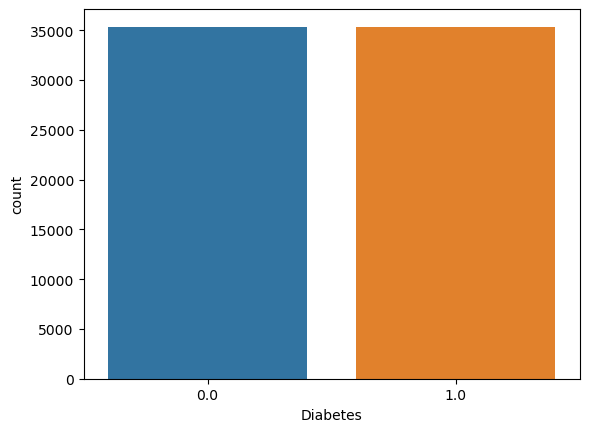

In [5]:
sns.countplot(x='Diabetes',data = df)

<Axes: >

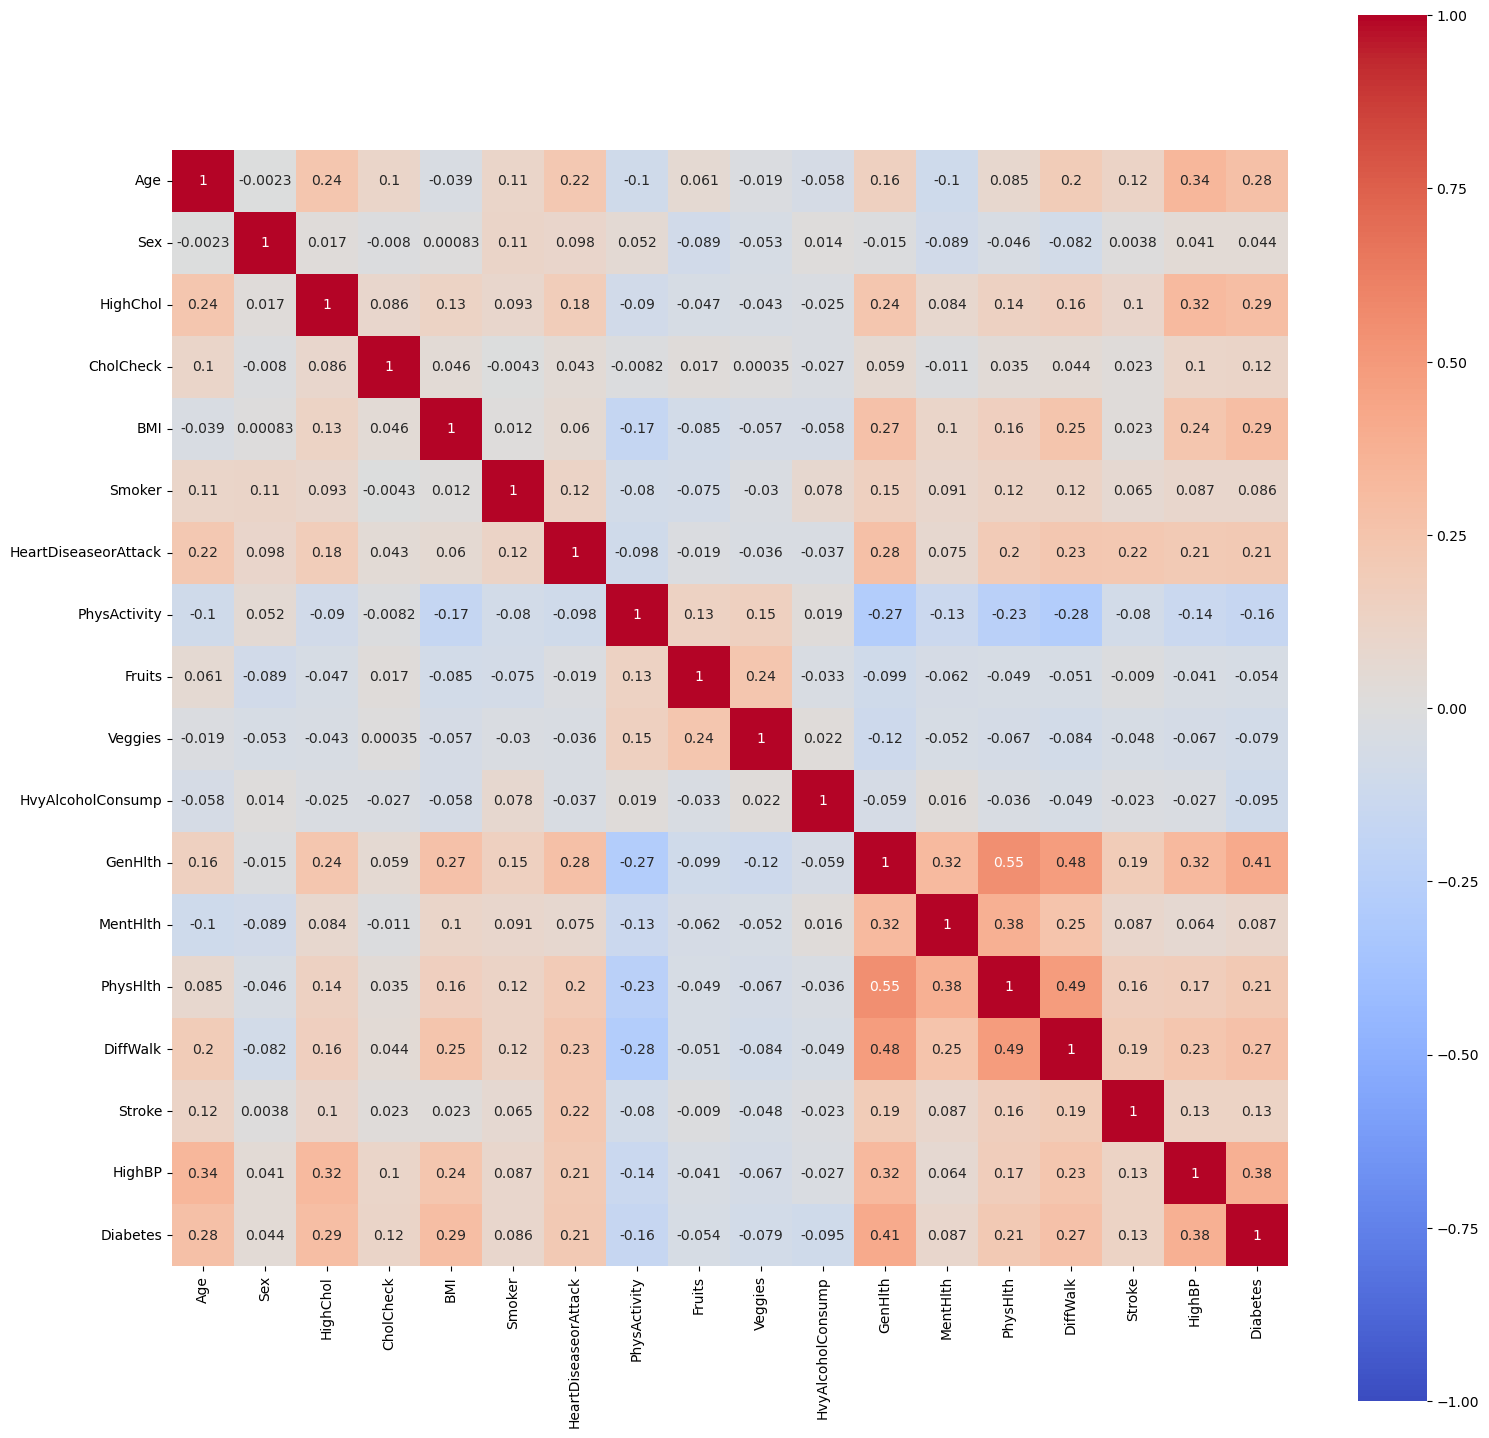

In [6]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

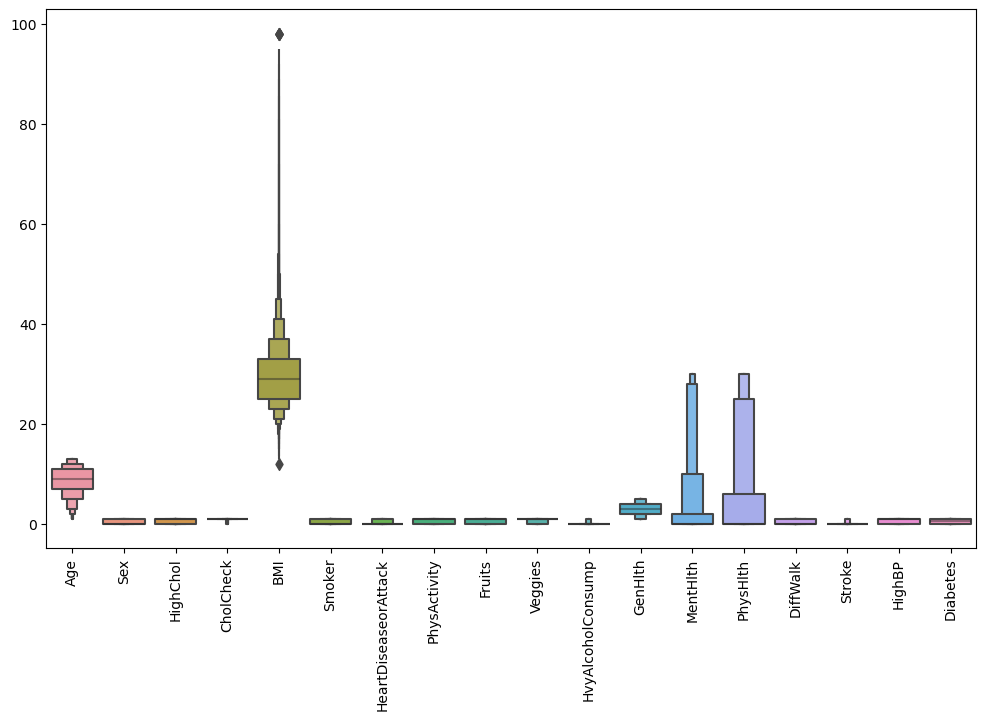

In [7]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [31]:
df.shape

(70692, 18)

In [36]:
print('mean of mental helth: ',df.MentHlth.mean())
print('mean of physical helth: ',df.PhysHlth.mean())
print('mean of BMI: ',df.BMI.mean())

mean of mental helth:  3.7520370056017653
mean of physical helth:  5.810417020313473
mean of BMI:  29.856985231709388


In [39]:
df = df[(df["BMI"]<40.0)&(df["BMI"]>-2.0)]
df = df[(df["MentHlth"]<5)&(df["MentHlth"]>-2.0)]
df = df[(df["PhysHlth"]<10)&(df["PhysHlth"]>-2.0)]

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

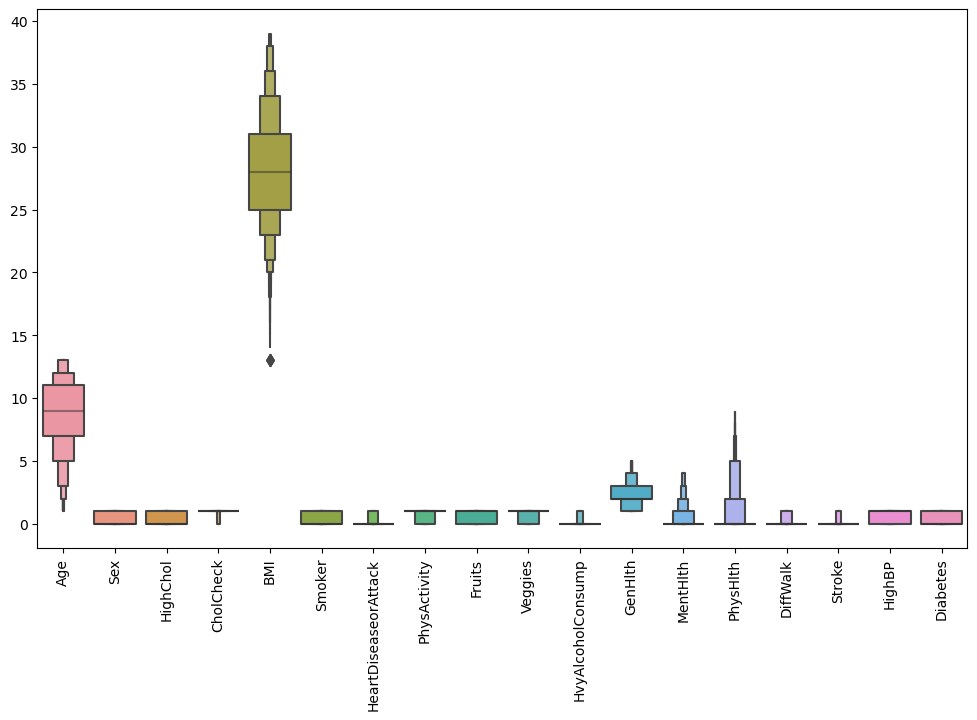

In [40]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [41]:
x = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30)
dt_model = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30)
knn_model = KNeighborsClassifier(n_neighbors=3)
logistic_model = LogisticRegression()
NB_model = MultinomialNB()

In [44]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [45]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, random_state=42)

In [46]:
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [47]:
logistic_model.fit(xtrain, ytrain)

C:\Users\Aakash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
NB_model.fit(xtrain, ytrain)

MultinomialNB()

In [49]:
rf_score = rf_model.score(xtest, ytest)
knn_score = knn_model.score(xtest, ytest)
dt_score = dt_model.score(xtest, ytest)
logistic_score = logistic_model.score(xtest, ytest)
NB_score = NB_model.score(xtest, ytest)

In [50]:
print('Random Forest Classifier Score : ', rf_score)
print('KNeighborsClassifier Score : ', knn_score)
print('Decission Tree Classifier Score : ', dt_score)
print('Logistic Regression Score : ', logistic_score)
print('Multinomial Navy Baise Score: ', NB_score)

Random Forest Classifier Score :  0.7439893143365984
KNeighborsClassifier Score :  0.6905609973285841
Decission Tree Classifier Score :  0.7308548530721283
Logistic Regression Score :  0.7399821905609973
Multinomial Navy Baise Score:  0.678539626001781


In [54]:
y_pred = logistic_model.predict(xtest)

<Axes: >

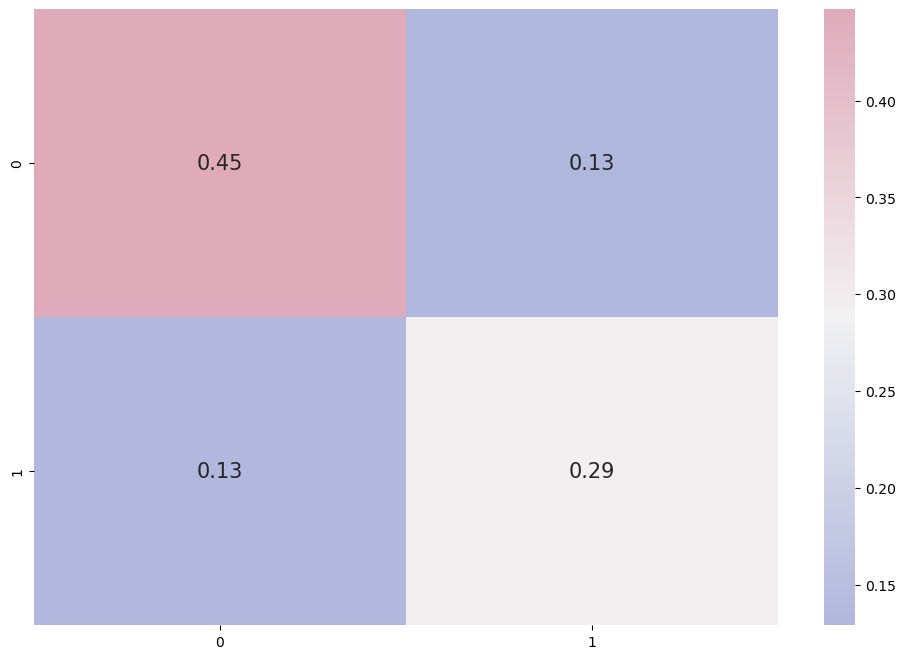

In [58]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [59]:
import pickle

# Assuming 'model' is the trained RandomForestRegressor
with open('dtmodel.pkl', 'wb') as file:
    pickle.dump(dt_model, file)